In [1]:
#%% Import Moduels

## System Tools
#%% Import Moduels

## System Tools
from _Public import *

import seaborn as sns
import matplotlib.backends.backend_pdf as figpdf
import matplotlib.dates as matdates
import pyfixest as pf
from binsreg import binsreg

## Output Folder
OutputFolder = 'Micro_data/results/AbReturnDistribution/'
if not os.path.exists(OutputFolder):
    os.makedirs(OutputFolder)
## Self-written Modules
import Toolkit_TimeSeries as MyTS
import Toolkit_Graphics as MyGR

# Construct the sample

## Load in the data

In [2]:
DataFolder          =   "Micro_data\\datasets\\SDC\\"
SDC_AccAbRet        =   pd.read_pickle(DataFolder+"SDC_AccAbRet.p")
SDC_IssuanceInfo    =   pd.read_pickle(DataFolder+"SDC_IssuanceInfo.p") 

In [15]:
SamplePeriod  = (datetime.date(1985,1,1), datetime.date(2018,12,31))


In [16]:
# Sample restriction:
# 1. Sample period: 1985Q1-2018Q2
TempInd = (SDC_IssuanceInfo['IssueDate'] >= SamplePeriod[0]) & (SDC_IssuanceInfo['IssueDate'] <= SamplePeriod[1])
# 2. Only primary share offering 
TempInd = TempInd & (SDC_IssuanceInfo['ShareType']=='Primary')




In [17]:
Sample = SDC_IssuanceInfo.loc[TempInd, :]

In [21]:
Sample.merge(SDC_AccAbRet.reset_index(), on='IssueID', how='left').loc[:, SDC_AccAbRet.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
FF5_PreEvent_F_AccRet,3488.0,-0.021903,0.093908,-0.567984,-0.055107,-0.016582,0.012562,2.345669
FF5_PreEvent_F_AccAbRet,3467.0,-0.0256,0.091888,-0.560984,-0.058448,-0.019517,0.00898,2.330941
FF5_PreEvent_L_AccRet,3516.0,-0.037119,0.09578,-0.645193,-0.073331,-0.028262,0.005814,1.040445
FF5_PreEvent_L_AccAbRet,3499.0,-0.04058,0.093352,-0.61202,-0.07602,-0.031844,0.003374,1.060504
FF5_PreEvent_I_AccRet,3530.0,-0.027551,0.103635,-1.18497,-0.06638,-0.015776,0.024693,0.487295
FF5_PreEvent_I_AccAbRet,3509.0,-0.030165,0.102142,-1.188723,-0.067633,-0.0189,0.022097,0.484508
FF5_PostEvent_F_AccRet,3488.0,-0.021903,0.093908,-0.567984,-0.055107,-0.016582,0.012562,2.345669
FF5_PostEvent_F_AccAbRet,3468.0,-0.021369,0.090368,-0.538019,-0.053677,-0.017185,0.011583,2.31972
FF5_PostEvent_L_AccRet,3516.0,-0.037119,0.09578,-0.645193,-0.073331,-0.028262,0.005814,1.040445
FF5_PostEvent_L_AccAbRet,3492.0,-0.035508,0.093306,-0.675918,-0.071229,-0.027195,0.006916,1.056761


In [ ]:
VarList_AbRet = ['FF5_PreEvent_F_AccAbRet', 'FF5_I_AccAbRet', 'FF5_L_AccAbRet']

temp = SDC_AccAbRet.loc[:, VarList_AbRet]
temp[VarList_AbRet] = temp[VarList_AbRet]*100
temp = temp.rename(columns={x: x.replace('FF5_', '') for x in VarList_AbRet}).reset_index()

In [5]:
Sample = SDC_IssuanceInfo.merge(temp, how='left', left_on='IssueID', right_on='IssueID', indicator=True)

NameError: name 'temp' is not defined

In [13]:
Sample = SDC_IssuanceInfo.copy()

## Clean the data

In [14]:
# Measure the price drop differently for firms with different shelf-issuance type 
TempInd = Sample['ShelfIssueFlag']==1

Sample['EventDate'] = Sample['FilingDate']
Sample.loc[TempInd, 'EventDate'] = Sample.loc[TempInd, 'IssueDate']

Sample['AccAbRet'] = Sample['F_AccAbRet']
Sample.loc[TempInd, 'AccAbRet'] = Sample.loc[TempInd, 'I_AccAbRet']

Sample['EventDate_Quarter'] = Sample['FilingDate_Quarter']
Sample.loc[TempInd, 'EventDate_Quarter'] = Sample.loc[TempInd, 'IssueDate_Quarter']

KeyError: 'F_AccAbRet'

In [7]:
# Different measures of issuance 
Sample['LogProceeds'] = np.log(Sample['ProceedsAmount'])
Sample['Proceed_Asset'] = Sample['ProceedsAmount'] / Sample['TotalAsset_BeforeOffering']
Sample['Proceed_Equity'] = Sample['ProceedsAmount'] / Sample['TotalEquity']
Sample['Log_Asset'] = np.log(Sample['TotalAsset_BeforeOffering'])
Sample['Leverage'] = Sample['TotalDebt'] / Sample['TotalAsset_BeforeOffering']
Sample['ExtraShare'] = Sample['OfferedTotalShares']/Sample['TotalShares_BeforeOffering']

NameError: name 'Sample' is not defined

In [ ]:
Sample.columns

Index(['IssueID', 'IssueID_ObsNum', 'FilingDate', 'FilingDateFlag',
       'FilingDate_Year', 'FilingDate_Quarter', 'FilingDate_Month',
       'LaunchDate', 'LaunchDateFlag', 'LaunchDate_Year', 'LaunchDate_Quarter',
       'LaunchDate_Month', 'IssueDate', 'IssueDateFlag', 'IssueDate_Year',
       'IssueDate_Quarter', 'IssueDate_Month', 'GapDays_F2I', 'GapDays_L2I',
       'GapDays_F2L', 'GapBusDays_F2I', 'GapBusDays_L2I', 'GapBusDays_F2L',
       'SIC', 'FF5_Name', 'FF5_Code', 'FF10_Name', 'FF10_Code', 'Issuer',
       'Nation', 'Exchange', 'CUSIP', 'CUSIP_9digit', 'CUSIP_1_6', 'CUSIP_7_8',
       'CUSIP_8digit', 'CUSIP_DigitNum', 'TickerSymbol', 'DaysInRegistration',
       'RightsOfferFlag', 'Rule415ShelfFlag', 'ProceedsUse', 'PrincipalAmount',
       'FiledAmount', 'ProceedsAmount', 'RealPrincipalAmount',
       'RealFiledAmount', 'RealProceedsAmount', 'FiledShares',
       'OfferedTotalShares', 'OfferedPrimaryShares', 'OfferedSecondaryShares',
       'OfferAvgPrice', 'OfferedPrimar

In [8]:
Sample['ShareType'].value_counts()

NameError: name 'Sample' is not defined

In [9]:
Sample['RightsOfferFlag'].value_counts()

NameError: name 'Sample' is not defined

<Axes: xlabel='EventDate_Quarter'>

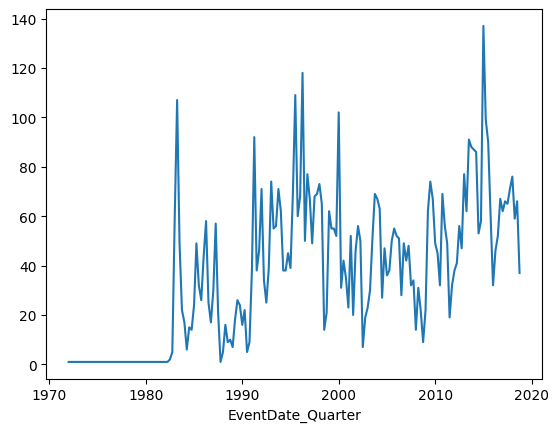

In [ ]:
Sample['EventDate_Quarter'].value_counts().sort_index().plot()

In [10]:
TempInd_Date = (Sample['EventDate_Quarter'] > datetime.date(1985, 1, 1) ) & (Sample['EventDate_Quarter'] < datetime.date(2019, 1, 1))
TempInd_NaN = np.isfinite(Sample[['Proceed_Asset', 'AccAbRet', 'LogProceeds', 'ExtraShare']]).all(axis=1)

NameError: name 'Sample' is not defined

In [11]:
Sample = Sample.loc[TempInd_Date & TempInd_NaN, :]

NameError: name 'Sample' is not defined

# Basic analysis

## Some simple distribution of key variables 

In [12]:
VarList = ['Proceed_Asset', 'Proceed_Equity', 'ExtraShare', 'AccAbRet']
PctList = [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999]

In [14]:
DescStat = Sample[VarList].describe(percentiles=PctList)
DescStat 

,Proceed_Asset,Proceed_Equity,ExtraShare,AccAbRet
count,6140.000000,4764.000000,6140.000000,6027.0
mean,0.615095,0.579218,10.377914,-2.776659
std,2.896428,5.367772,731.951930,8.07391
min,0.000021,-39.675000,0.000000,-73.96366
0.1%,0.003631,-17.489207,0.001160,-53.681448
0.5%,0.008907,-4.363545,0.006199,-37.897758
1%,0.014320,-1.947343,0.012336,-28.991755
5%,0.037424,0.052873,0.037838,-14.036717
10%,0.055212,0.106435,0.057774,-10.330709
25%,0.118940,0.228332,0.094380,-6.08927


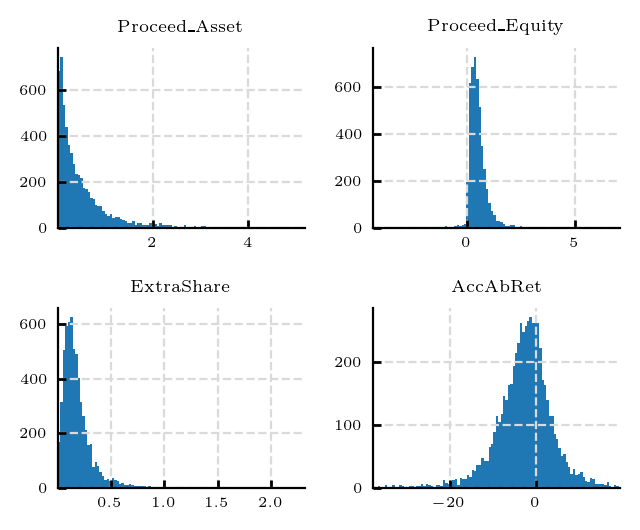

In [15]:

    
Fig = MyGR.Setup_Fig(FigSize=(1/5 * 2, 1/6 * 2))
for (ii, vv) in enumerate(VarList):
    ax = Fig.add_subplot(2,2,ii+1)
    tempind = (Sample[vv]>DescStat.loc['0.5%', vv]) & (Sample[vv]<DescStat.loc['99.5%', vv])
    Sample.loc[tempind, vv].hist(ax=ax, bins=100)
    ax.set_title(vv, fontsize=6)
    ax.set_xlim(DescStat.loc['0.5%', vv], DescStat.loc['99.5%', vv])
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    MyGR.Setup_Ax(ax)

plt.tight_layout()

## Correlation with the abnormal return

In [16]:
Flag_Start = True
for vv in VarList:
    if Flag_Start:
        Flag_Start = False
        TempInd_Outliner = (Sample[vv]<DescStat.loc['0.5%', vv]) | (Sample[vv]>DescStat.loc['99.5%', vv])
    else:
        TempInd_Outliner = TempInd_Outliner | (Sample[vv]<DescStat.loc['0.5%', vv]) | (Sample[vv]>DescStat.loc['99.5%', vv])

    

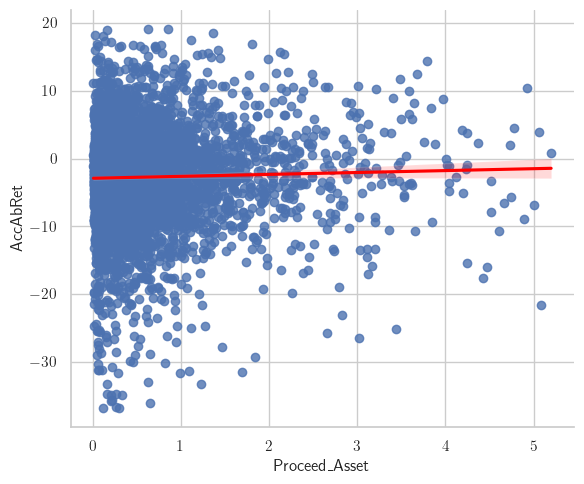

In [17]:
sns.set(style="whitegrid")
sns.lmplot(x='Proceed_Asset', y='AccAbRet', data=Sample.loc[~TempInd_Outliner, :], ci=95, height=5, aspect=1.2, line_kws={"color": "red"})


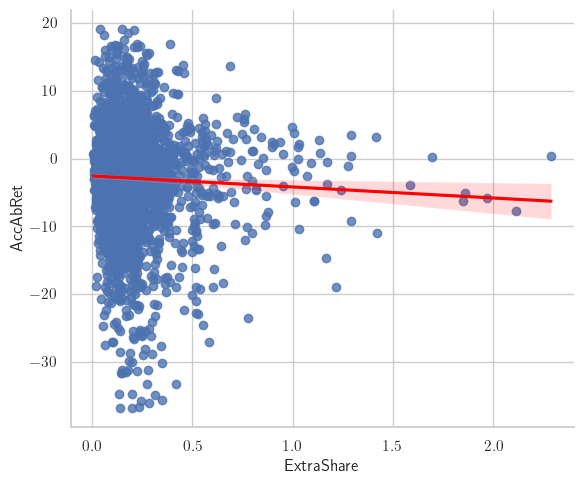

In [18]:
tempind = (~TempInd_Outliner) & (Sample['ShareType']=='Primary')
sns.lmplot(x='ExtraShare', y='AccAbRet', data=Sample.loc[tempind, :], ci=95, height=5, aspect=1.2, line_kws={"color": "red"})

b:\Dropbox\Research Projects\02_HeteFirm_AsymetricInformation\Data\venv_py13\Lib\site-packages\binsreg\binsreg.py:792: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


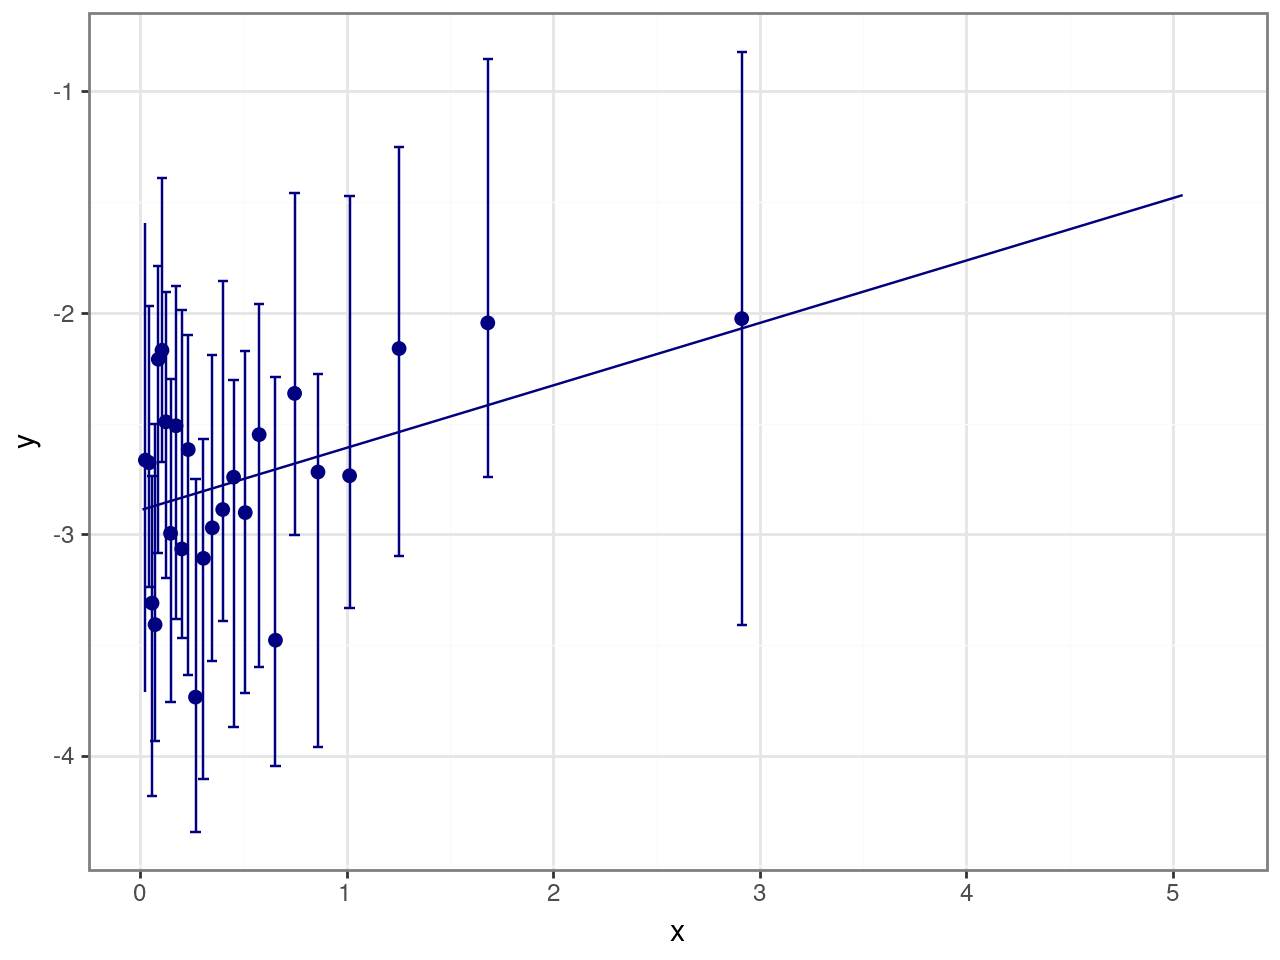

Call: binsreg

Binscatter Plot
Bin/Degree selection method (binsmethod) =  IMSE direct plug-in (select # of bins)
Placement (binspos)                      =                         Quantile-spaced
Derivative (deriv)                       =                                       0
 
Group (by)                               =                             Full Sample
Sample size (n)                          =                                    5816
# of distinct values (Ndist)             =                                    5752
# of clusters (Nclust)                   =                                     nan
dots, degree (p)                         =                                       0
dots, smooth (s)                         =                                       0
# of bins (nbins)                        =                                      25




In [19]:
binsreg(Sample.loc[~TempInd_Outliner, 'AccAbRet'], Sample.loc[~TempInd_Outliner, 'Proceed_Asset'], ci=(3,3), polyreg=1)

C:\Users\XingGuo\AppData\Local\Temp\ipykernel_12864\3977170421.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


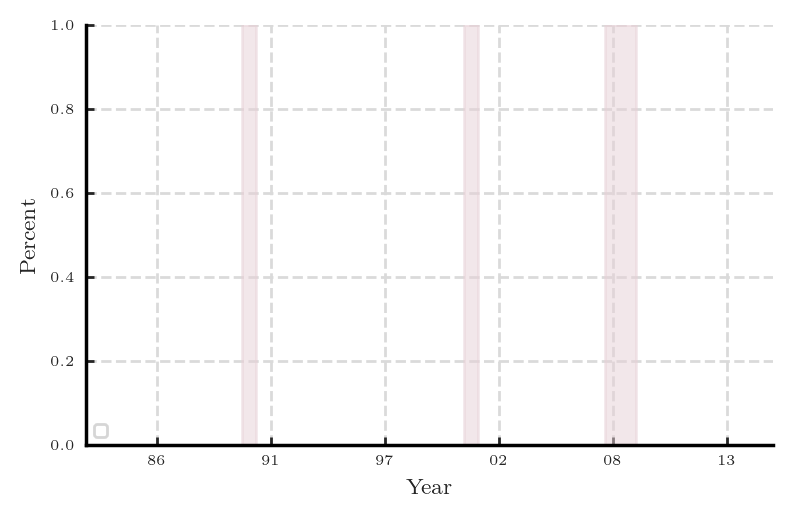

In [20]:
Fig = MyGR.Setup_Fig()
ax = Fig.add_subplot(1,1,1)
ax.set_xlim([datetime.date(1983,1,1),datetime.date(2015,12,31)])
ax.set_ylabel('Percent', fontsize=8) 
ax.set_xlabel('Year', fontsize=8)
ax.tick_params(axis='both', labelsize=5)
MyGR.NBER_RecessionBar(ax)
MyGR.Setup_Ax(ax, XDateFlag=True, XTickNbins=10)
plt.legend(loc='lower left', fontsize=6)

plt.tight_layout()

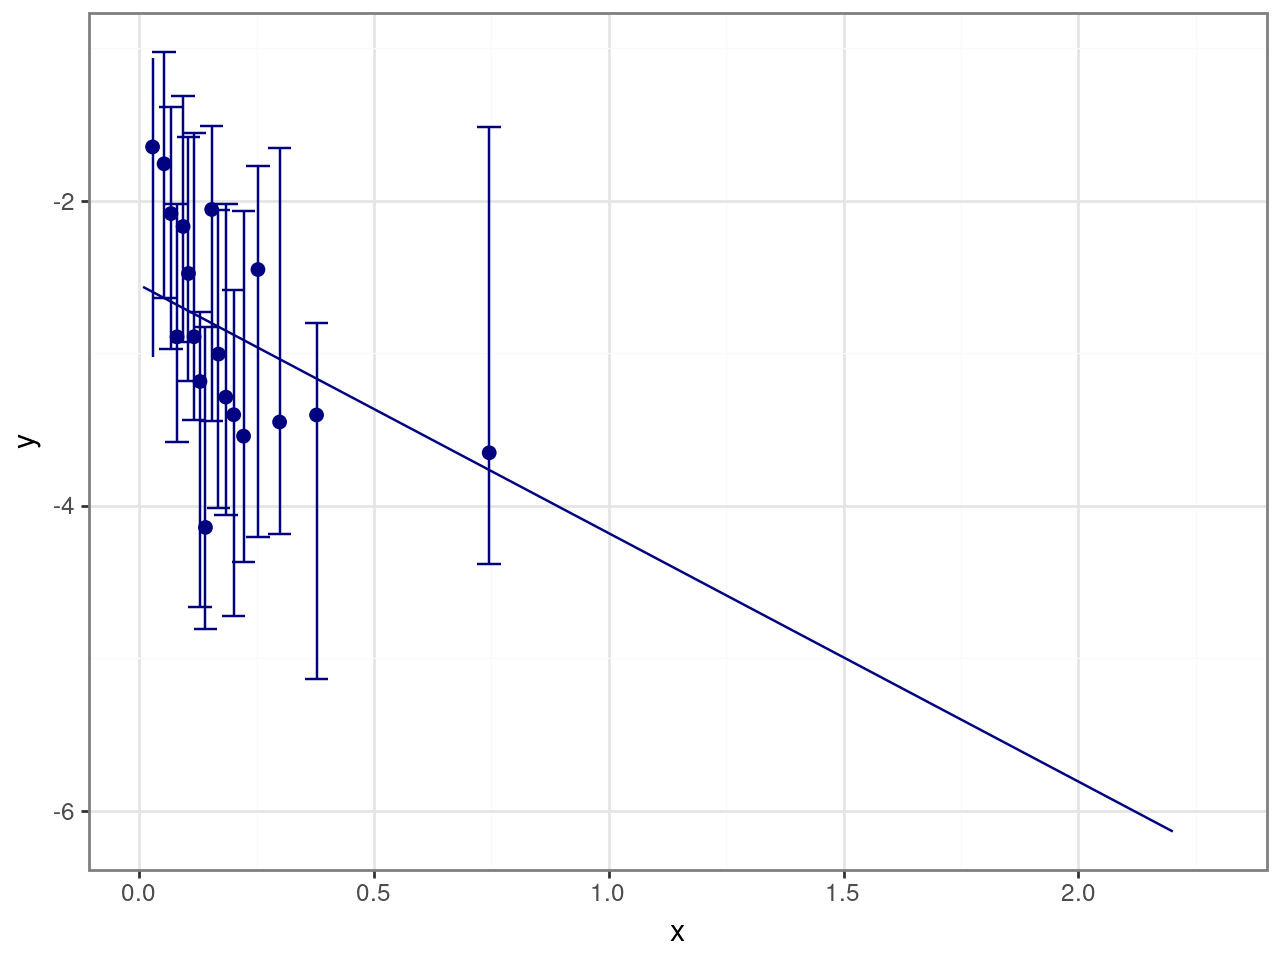

<Figure size 640x480 with 0 Axes>

In [21]:

tempind = (~TempInd_Outliner) & (Sample['ShareType']=='Primary')
binsreg(Sample.loc[tempind, 'AccAbRet'], Sample.loc[tempind, 'ExtraShare'], ci=(3,3), polyreg=1)
plt.savefig(OutputFolder+'Binscatter_Return_ExtraShare.png')

In [22]:
tempind = (~TempInd_Outliner) & (Sample['ShareType']=='Primary')
fit_AbRet = pf.feols("AccAbRet ~ Log_Asset + Leverage_BeforeOffering | EventDate_Quarter + FF10_Code + ShelfIssueFlag  ", data=Sample.loc[tempind, :])

TempDS = fit_AbRet._data[['IssueID', 'AccAbRet']].copy()
TempDS['AccAbRet_Res'] = fit_AbRet.resid()

TempDS_AbRet = TempDS.copy()

In [23]:
TempDS[['AccAbRet', 'AccAbRet_Res']].skew()

AccAbRet       -0.576387
AccAbRet_Res   -0.266539
dtype: Float64

In [24]:
tempind = (~TempInd_Outliner) & (Sample['ShareType']=='Primary')
fit_ExtShare = pf.feols("ExtraShare ~ Log_Asset + Leverage_BeforeOffering | EventDate_Quarter + FF10_Code + ShelfIssueFlag  ", data=Sample.loc[tempind, :])

TempDS = fit_ExtShare._data[['IssueID', 'ExtraShare']].copy()
TempDS['ExtraShare_Res'] = fit_ExtShare.resid()

TempDS_ExtShare = TempDS.copy()

array([[<Axes: title={'center': 'ExtraShare'}>,
        <Axes: title={'center': 'ExtraShare_Res'}>]], dtype=object)

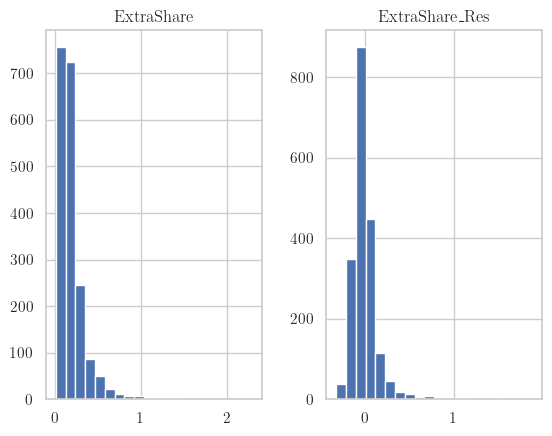

In [25]:
TempDS[['ExtraShare', 'ExtraShare_Res']].hist(bins=20)

In [26]:
TempDS = TempDS_AbRet.merge(TempDS_ExtShare, how='outer', on='IssueID')

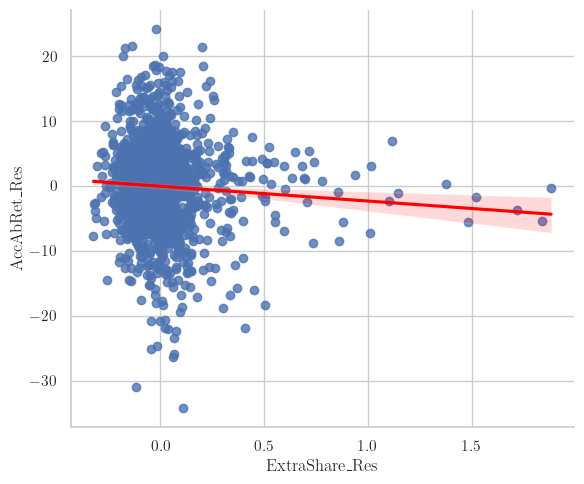

In [27]:
sns.lmplot(x='ExtraShare_Res', y='AccAbRet_Res', data=TempDS, ci=95, height=5, aspect=1.2, line_kws={"color": "red"}) 

In [28]:
tempind = (~TempInd_Outliner) & (Sample['ShareType']=='Primary')
fit = pf.feols("AccAbRet ~ ExtraShare + LogProceeds + Log_Asset + Leverage_BeforeOffering | EventDate_Quarter + FF10_Code + ShelfIssueFlag  ", data=Sample.loc[tempind, :])

fit.summary()

###

Estimation:  OLS
Dep. var.: AccAbRet, Fixed effects: EventDate_Quarter+FF10_Code+ShelfIssueFlag
Inference:  CRV1
Observations:  1930

| Coefficient             |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:------------------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| ExtraShare              |     -2.870 |        0.757 |    -3.791 |      0.000 | -4.367 |  -1.373 |
| LogProceeds             |      0.977 |        0.278 |     3.519 |      0.001 |  0.428 |   1.526 |
| Log_Asset               |     -0.415 |        0.170 |    -2.450 |      0.016 | -0.751 |  -0.080 |
| Leverage_BeforeOffering |     -0.100 |        0.121 |    -0.831 |      0.407 | -0.339 |   0.138 |
---
RMSE: 6.206 R2: 0.124 R2 Within: 0.02 


## Raw correlation with issuing shares

In [51]:
DescStat

,Proceed_Asset,Proceed_Equity,ExtraShare,AccAbRet
count,3181.000000,2404.000000,3181.000000,3181.0
mean,0.495689,0.414525,0.190160,-2.860605
std,0.593237,0.541451,0.178404,7.285629
min,0.009514,-4.302198,0.006376,-36.803431
0.1%,0.011045,-3.793271,0.008269,-35.998063
0.5%,0.015811,-1.537106,0.013810,-31.189738
1%,0.019290,-0.931394,0.018072,-26.419376
5%,0.037304,0.067089,0.041325,-15.495104
10%,0.054844,0.106741,0.058011,-11.284744
25%,0.110351,0.198609,0.093669,-6.441485


In [ ]:
Flag_Start = True
for vv in VarList:
    if Flag_Start:
        Flag_Start = False
        TempInd_Outliner = (Sample[vv]<DescStat.loc['0.5%', vv]) | (Sample[vv]>DescStat.loc['99.5%', vv])
    else:
        TempInd_Outliner = TempInd_Outliner | (Sample[vv]<DescStat.loc['0.5%', vv]) | (Sample[vv]>DescStat.loc['99.5%', vv])

In [53]:
tempind = (~TempInd_Outliner) & (Sample['ShareType']=='Primary')
Sample.loc[tempind, ['AccAbRet', 'ExtraShare', 'Proceed_Asset', 'Log_Asset']].corr(method='pearson')

,AccAbRet,ExtraShare,Proceed_Asset,Log_Asset
AccAbRet,1.000000,-0.039884,0.056672,0.065708
ExtraShare,-0.039884,1.000000,0.191699,-0.274929
Proceed_Asset,0.056672,0.191699,1.000000,-0.551716
Log_Asset,0.065708,-0.274929,-0.551716,1.000000


In [54]:
tempind.sum()

np.int64(3181)

# Some updated results

## Weighted average across time

In [29]:
def TempFun_WM(DS,VarList,WeightVar):
    Temp_Num        =   DS[VarList].multiply(DS[WeightVar],axis=0).sum(axis=0)
    Temp_DeNum      =   ( ~pd.isna(DS[VarList]) ).multiply(DS[WeightVar],axis=0).sum(axis=0)
    WM              =   Temp_Num.divide(Temp_DeNum,axis=0)
    WM.name         =   'WMean'
    
    return WM


In [30]:
tempind = (~TempInd_Outliner) & (Sample['ShareType']=='Primary')
TempSample = Sample.loc[tempind, :].copy()
temp = TempSample.groupby('EventDate_Quarter')['AccAbRet'].mean().rename('AccAbRet_Avg').reset_index()
TempSample = TempSample.merge(temp, how='left', left_on='EventDate_Quarter', right_on='EventDate_Quarter')
temp = TempSample.groupby('EventDate_Quarter')['ExtraShare'].mean().rename('ExtraShare_Avg').reset_index()
TempSample = TempSample.merge(temp, how='left', left_on='EventDate_Quarter', right_on='EventDate_Quarter')

TempSample['Flag_Negative'] = TempSample['AccAbRet'] < 0 
TempSample['Flag_BelowAvg'] = TempSample['AccAbRet'] < TempSample['AccAbRet_Avg']
TempSample['Flag_AboveAvgExtShare'] = TempSample['ExtraShare'] > TempSample['ExtraShare_Avg']

In [31]:
VarList = ['Proceed_Asset', 'Proceed_Equity', 'ExtraShare', 'AccAbRet']
PctList = [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999]

In [33]:
DescStat = TempSample[VarList].describe(percentiles=PctList)
DescStat 

,Proceed_Asset,Proceed_Equity,ExtraShare,AccAbRet
count,3181.000000,2404.000000,3181.000000,3181.0
mean,0.495689,0.414525,0.190160,-2.860605
std,0.593237,0.541451,0.178404,7.285629
min,0.009514,-4.302198,0.006376,-36.803431
0.1%,0.011045,-3.793271,0.008269,-35.998063
0.5%,0.015811,-1.537106,0.013810,-31.189738
1%,0.019290,-0.931394,0.018072,-26.419376
5%,0.037304,0.067089,0.041325,-15.495104
10%,0.054844,0.106741,0.058011,-11.284744
25%,0.110351,0.198609,0.093669,-6.441485


In [34]:
TempSample['AccAbRet'].describe()

count       3181.0
mean     -2.860605
std       7.285629
min     -36.803431
25%      -6.441485
50%      -2.254006
75%       1.206726
max      19.141529
Name: AccAbRet, dtype: Float64

<Axes: xlabel='EventDate_Quarter'>

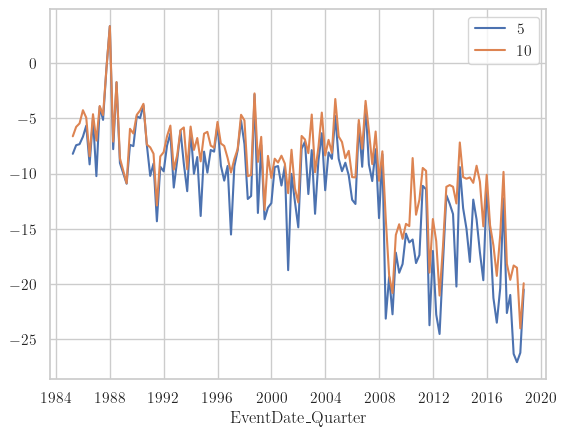

In [35]:
temp = TempSample.groupby('EventDate_Quarter')['AccAbRet'].describe(percentiles=PctList).sort_index()

temp[['5%', '10%']].plot()

In [36]:
temp.mean()

count    23.738806
mean     -2.685716
std       6.199084
min     -16.574964
0.1%    -16.448896
0.5%    -15.944622
1%      -15.314281
5%      -11.688553
10%      -9.476553
25%       -6.00853
50%      -2.361121
75%       0.787308
90%       3.773199
95%       5.751816
99%       8.384919
99.5%     8.742077
99.9%     9.027803
max       9.099235
dtype: Float64

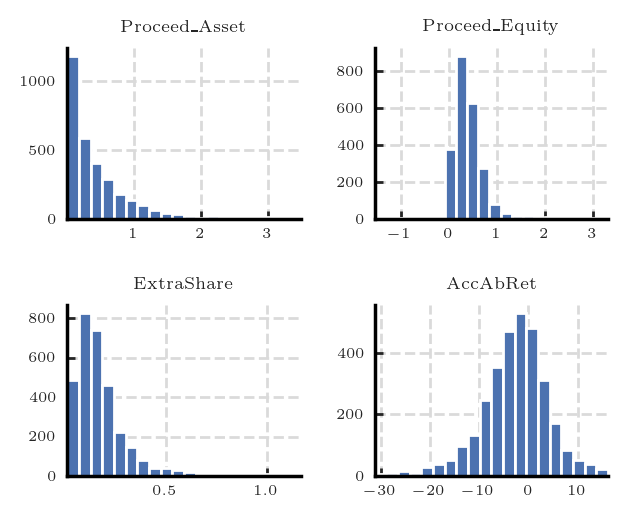

In [37]:
Fig = MyGR.Setup_Fig(FigSize=(1/5 * 2, 1/6 * 2))
for (ii, vv) in enumerate(VarList):
    ax = Fig.add_subplot(2,2,ii+1)
    tempind = (TempSample[vv]>DescStat.loc['0.5%', vv]) & (TempSample[vv]<DescStat.loc['99.5%', vv])
    TempSample.loc[tempind, vv].hist(ax=ax, bins=20)
    ax.set_title(vv, fontsize=6)
    ax.set_xlim(DescStat.loc['0.5%', vv], DescStat.loc['99.5%', vv])
    MyGR.Setup_Ax(ax)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)

plt.tight_layout()

<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\XingGuo\AppData\Local\Temp\ipykernel_12864\3654112581.py:11: SyntaxWarning: invalid escape sequence '\D'


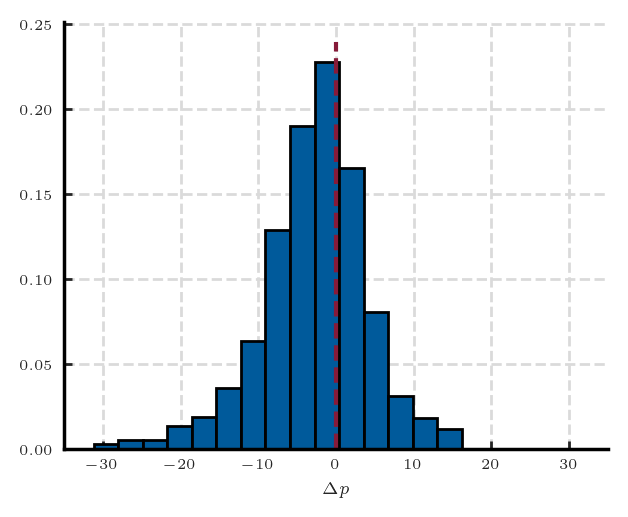

In [38]:
vv = 'AccAbRet'
Fig = MyGR.Setup_Fig(FigSize=(1/5 * 2, 1/6 * 2))
ax = Fig.add_subplot(1,1,1)
tempind = (TempSample[vv]>DescStat.loc['0.5%', vv]) & (TempSample[vv]<DescStat.loc['99.5%', vv])
# TempSample.loc[tempind, vv].hist(ax=ax, bins=15)
counts, bins = np.histogram(TempSample.loc[tempind, vv], bins=15)
probabilities = counts / counts.sum()
plt.bar(bins[:-1], probabilities, width=np.diff(bins), edgecolor='black', facecolor=MyGR.MyColor('Blue'), align='edge')
ax.vlines(0, 0, ax.get_ylim()[1], color=MyGR.MyColor('Red'), linestyle='--')
ax.set_xlim(-35, 35)
ax.set_xlabel('$\Delta p$', fontsize=6)
# for spine in ax.spines.values():
#     spine.set_color('black')
MyGR.Setup_Ax(ax, XTickNbins=7, YTickNbins=7)
# plt.tick_params(axis='both', length=3, width=1, direction='in', labelsize=5)
plt.tight_layout()

plt.savefig(OutputFolder+'Hist_PriceDropDist_Data.eps', format='eps', dpi=1000)

In [39]:
DataDict = {}
DataDict['AccAbRet_Avg'] = TempSample.groupby('EventDate_Quarter')['AccAbRet'].mean().sort_index()
DataDict['AccAbRet_WAvg'] = TempSample.groupby('EventDate_Quarter').apply(TempFun_WM, ['AccAbRet'], 'ExtraShare', include_groups=False).sort_index()['AccAbRet'].rename('AccAbRet_WAvg')

DataDict['AccAbRet_Avg_Negative'] = TempSample.loc[TempSample['Flag_Negative'], :].groupby('EventDate_Quarter')['AccAbRet'].mean().sort_index()
DataDict['AccAbRet_WAvg_Negative'] = TempSample.loc[TempSample['Flag_Negative'], :].groupby('EventDate_Quarter').apply(TempFun_WM, ['AccAbRet'], 'ExtraShare', include_groups=False).sort_index()['AccAbRet'].rename('AccAbRet_WAvg_Negative')

DataDict['AccAbRet_Avg_BelowAvg'] = TempSample.loc[TempSample['Flag_BelowAvg'], :].groupby('EventDate_Quarter')['AccAbRet'].mean().sort_index()
DataDict['AccAbRet_WAvg_BelowAvg'] = TempSample.loc[TempSample['Flag_BelowAvg'], :].groupby('EventDate_Quarter').apply(TempFun_WM, ['AccAbRet'], 'ExtraShare', include_groups=False).sort_index()['AccAbRet'].rename('AccAbRet_WAvg_BelowAvg')

DataDict['AccAbRet_Avg_AboveAvgExtShare'] = TempSample.loc[TempSample['Flag_AboveAvgExtShare'], :].groupby('EventDate_Quarter')['AccAbRet'].mean().sort_index()
DataDict['AccAbRet_WAvg_AboveAvgExtShare'] = TempSample.loc[TempSample['Flag_AboveAvgExtShare'], :].groupby('EventDate_Quarter').apply(TempFun_WM, ['AccAbRet'], 'ExtraShare', include_groups=False).sort_index()['AccAbRet'].rename('AccAbRet_WAvg_AboveAvgExtShare')

(np.float64(5479.0), np.float64(17897.0))

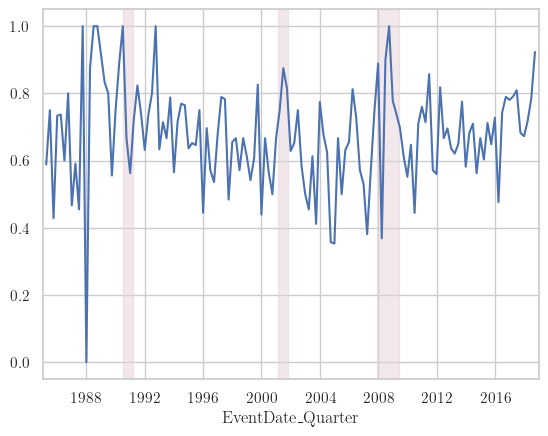

In [40]:
ax = TempSample.groupby('EventDate_Quarter')['Flag_Negative'].mean().sort_index().plot()
MyGR.NBER_RecessionBar(ax)
ax.set_xlim(datetime.date(1985, 1, 1), datetime.date(2019, 1, 1))

In [41]:
DataForPlot = pd.concat(DataDict, axis=1).sort_index()

In [42]:
TempTab = DataForPlot.mean().rename('Mean')
TempTab 

AccAbRet_Avg                     -2.685716
AccAbRet_WAvg                    -2.906365
AccAbRet_Avg_Negative             -5.85729
AccAbRet_WAvg_Negative           -6.345014
AccAbRet_Avg_BelowAvg            -7.799415
AccAbRet_WAvg_BelowAvg           -8.233579
AccAbRet_Avg_AboveAvgExtShare    -3.067239
AccAbRet_WAvg_AboveAvgExtShare   -3.081869
Name: Mean, dtype: Float64

In [43]:
TempTab.to_latex(OutputFolder+'AvgAbRet_AcrossTime.tex', float_format="%.3g", escape=True)

<Axes: xlabel='EventDate_Quarter'>

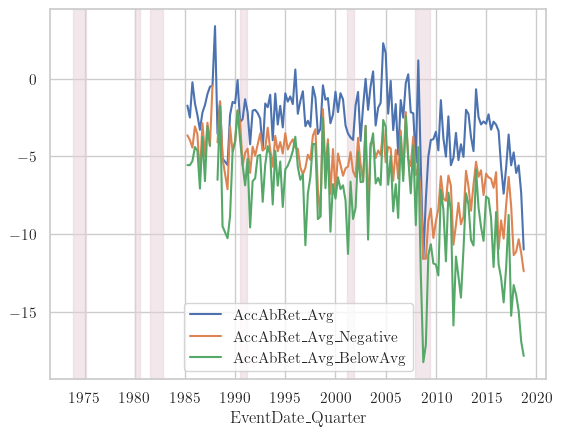

In [44]:
DataForPlot[['AccAbRet_Avg', 'AccAbRet_Avg_Negative', 'AccAbRet_Avg_BelowAvg']].plot()
MyGR.NBER_RecessionBar(plt.gca())

<Axes: xlabel='EventDate_Quarter'>

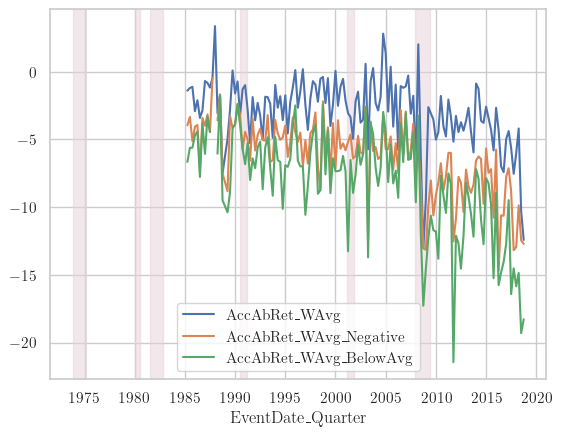

In [45]:
DataForPlot[['AccAbRet_WAvg', 'AccAbRet_WAvg_Negative', 'AccAbRet_WAvg_BelowAvg']].plot()
MyGR.NBER_RecessionBar(plt.gca())

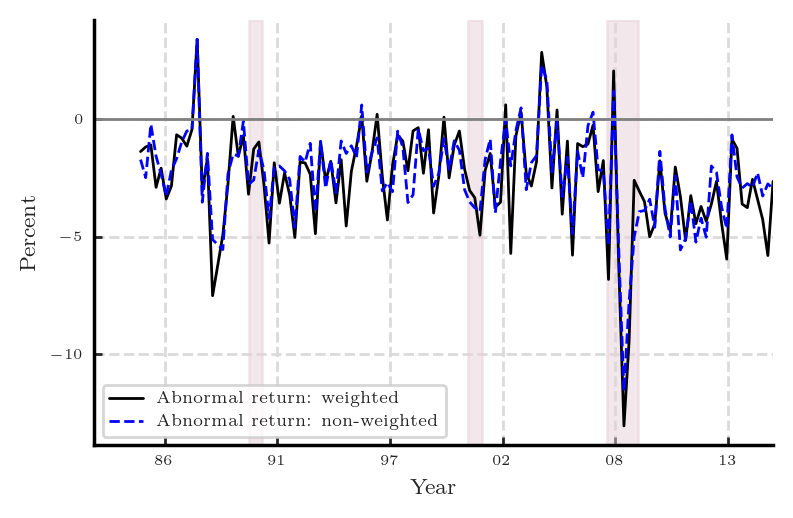

In [46]:
Fig = MyGR.Setup_Fig()
ax = Fig.add_subplot(1,1,1)
MyGR.Line(Width=1).Plot(DataForPlot.index, DataForPlot['AccAbRet_WAvg'], ax=ax, Label="Abnormal return: weighted")
MyGR.Line(Color="Blue", Style="dashed", Width=1).Plot(DataForPlot.index, DataForPlot['AccAbRet_Avg'], ax=ax, Label="Abnormal return: non-weighted")
ax.set_xlim([datetime.date(1983,1,1),datetime.date(2015,12,31)])
ax.set_ylabel('Percent', fontsize=8) 
ax.set_xlabel('Year', fontsize=8)
ax.tick_params(axis='both', labelsize=5)
MyGR.NBER_RecessionBar(ax)
MyGR.Setup_Ax(ax, XDateFlag=True, XTickNbins=10)
plt.legend(loc='lower left', fontsize=6)

plt.tight_layout()

plt.savefig(OutputFolder+'AccAbRet_BusinessCycle_WeightedByShare.eps', format='eps', dpi=1000)

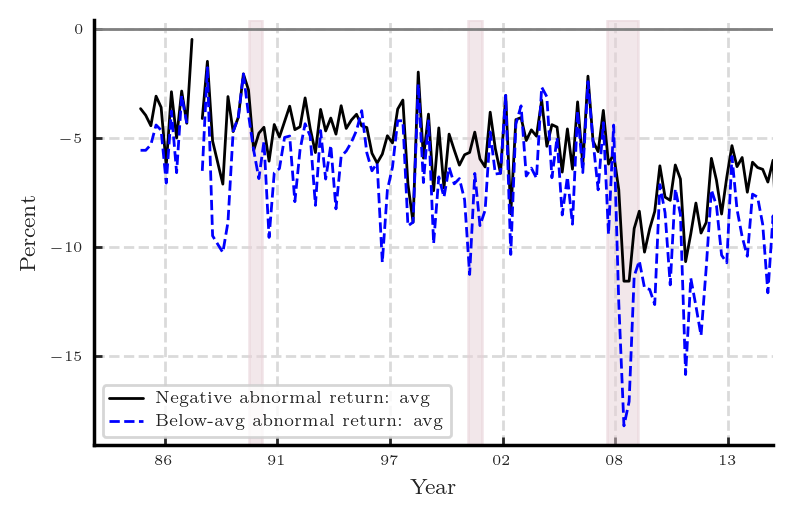

In [47]:
Fig = MyGR.Setup_Fig()
ax = Fig.add_subplot(1,1,1)
MyGR.Line(Width=1).Plot(DataForPlot.index, DataForPlot['AccAbRet_Avg_Negative'], ax=ax, Label="Negative abnormal return: avg")
MyGR.Line(Color="Blue", Style="dashed", Width=1).Plot(DataForPlot.index, DataForPlot['AccAbRet_Avg_BelowAvg'], ax=ax, Label="Below-avg abnormal return: avg")
ax.set_xlim([datetime.date(1983,1,1),datetime.date(2015,12,31)])
ax.set_ylabel('Percent', fontsize=8) 
ax.set_xlabel('Year', fontsize=8)
ax.tick_params(axis='both', labelsize=5)
MyGR.NBER_RecessionBar(ax)
MyGR.Setup_Ax(ax, XDateFlag=True, XTickNbins=10)
plt.legend(loc='lower left', fontsize=6)

plt.tight_layout()

plt.savefig(OutputFolder+'AccAbRet_BusinessCycle_AvgLeftTail.eps', format='eps', dpi=1000)

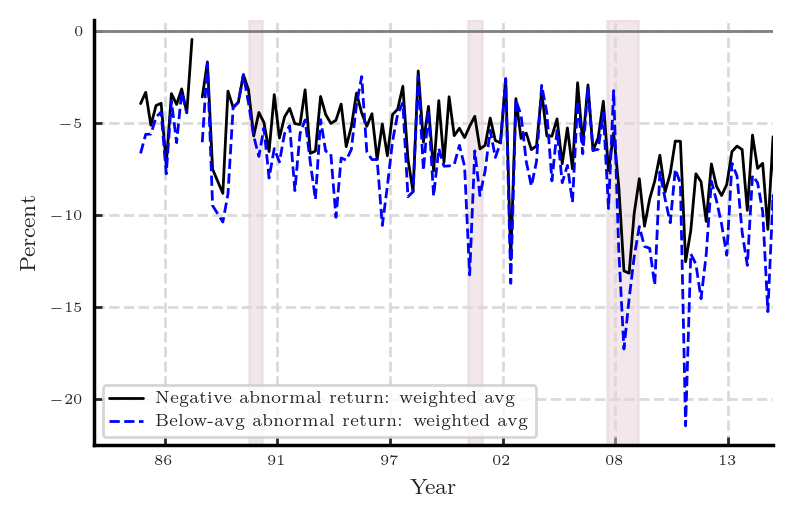

In [48]:
Fig = MyGR.Setup_Fig()
ax = Fig.add_subplot(1,1,1)
MyGR.Line(Width=1).Plot(DataForPlot.index, DataForPlot['AccAbRet_WAvg_Negative'], ax=ax, Label="Negative abnormal return: weighted avg")
MyGR.Line(Color="Blue", Style="dashed", Width=1).Plot(DataForPlot.index, DataForPlot['AccAbRet_WAvg_BelowAvg'], ax=ax, Label="Below-avg abnormal return: weighted avg")
ax.set_xlim([datetime.date(1983,1,1),datetime.date(2015,12,31)])
ax.set_ylabel('Percent', fontsize=8) 
ax.set_xlabel('Year', fontsize=8)
ax.tick_params(axis='both', labelsize=5)
MyGR.NBER_RecessionBar(ax)
MyGR.Setup_Ax(ax, XDateFlag=True, XTickNbins=10)
plt.legend(loc='lower left', fontsize=6)

plt.tight_layout()